In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\Bhavya\Downloads\BlackFriday.csv\BlackFriday.csv")

In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
data.shape

(537577, 12)

In [5]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [6]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [7]:
# filling the missing values

data['Product_Category_2'].fillna(0, inplace = True)
data['Product_Category_3'].fillna(0, inplace = True)



In [8]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [9]:
data['Gender'].value_counts()

Gender
M    405380
F    132197
Name: count, dtype: int64

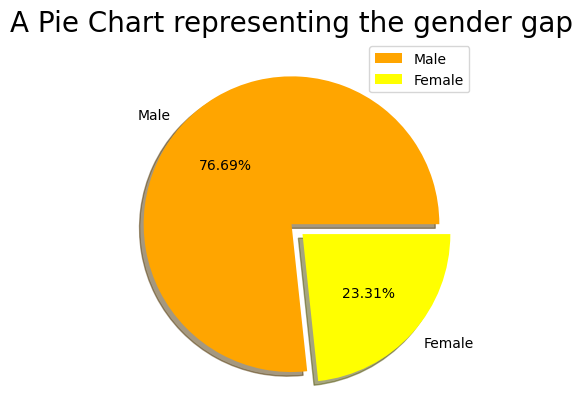

In [10]:
# pie chart 

size = [405380, 123197]
labels = ['Male', 'Female']
colors = ['orange', 'yellow']
explode = [0, 0.1]

plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.legend()
plt.show() 



In [11]:
#### Maximum and Minimum Purchase across genders

data.groupby(data.Gender).Purchase.max()

Gender
F    23959
M    23961
Name: Purchase, dtype: int64

In [12]:
data.groupby(data.Gender).Purchase.min()

Gender
F    185
M    185
Name: Purchase, dtype: int64

In [13]:
# checking dependency of gender on purchase

data[['Gender','Purchase']].groupby('Gender').mean()

,Purchase
Gender,
F,8809.761349
M,9504.771713


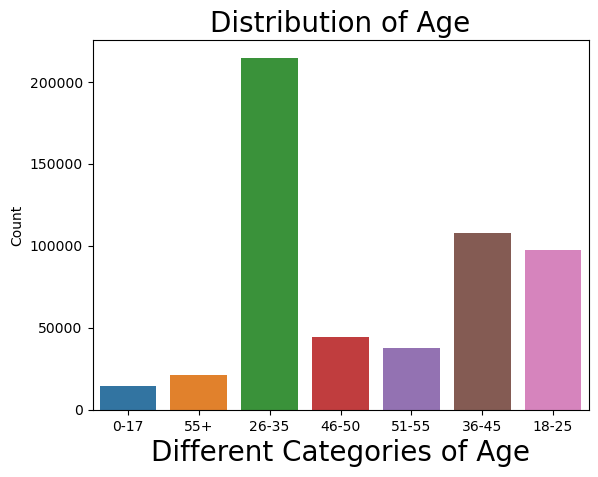

In [14]:
# visualizing the age of customers

sns.countplot(x=data['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Different Categories of Age', fontsize = 20)
plt.ylabel('Count')
plt.show()

In [15]:
# checing the dependency of age attribute with purchasing power

data[['Age','Purchase']].groupby('Age').mean()

,Purchase
Age,
0-17,9020.126878
18-25,9235.197575
26-35,9314.588970
36-45,9401.478758
46-50,9284.872277
51-55,9620.616620
55+,9453.898579


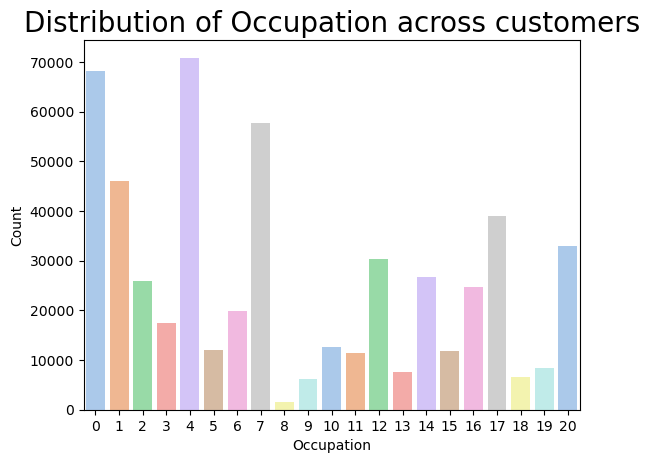

In [16]:
# visualizing the occupation of customers

sns.countplot(x=data['Occupation'], palette = 'pastel')
plt.title('Distribution of Occupation across customers', fontsize = 20)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

In [17]:
# checking the dependency of occupation on purchasing power

data[['Occupation','Purchase']].groupby('Occupation').mean()

,Purchase
Occupation,
0,9186.946726
1,9017.703095
2,9025.938982
3,9238.077277
4,9279.026742
5,9388.848978
6,9336.378620
7,9502.175276
8,9576.508530


In [18]:
data['City_Category'] = data['City_Category'].map({'A': 1, 'B': 2, 'C': 3})

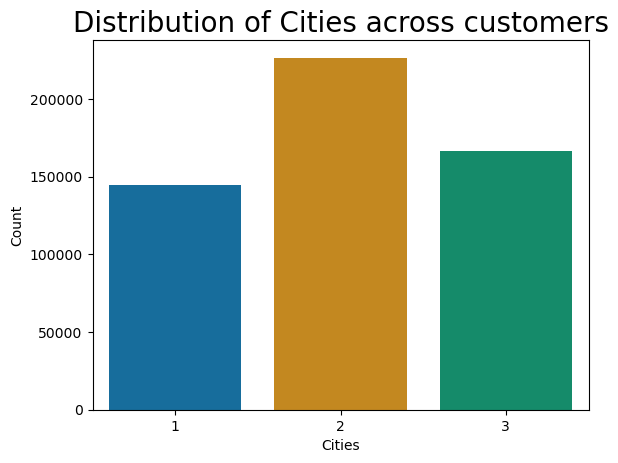

In [19]:
# visulaizing the cities the customers are from

sns.countplot(x=data['City_Category'], palette = 'colorblind')
plt.title('Distribution of Cities across customers', fontsize = 20)
plt.xlabel('Cities')
plt.ylabel('Count')
plt.show()

In [20]:
#visualize the stay of customers in a city

data['Stay_In_Current_City_Years'].value_counts()

Stay_In_Current_City_Years
1     189192
2      99459
3      93312
4+     82889
0      72725
Name: count, dtype: int64

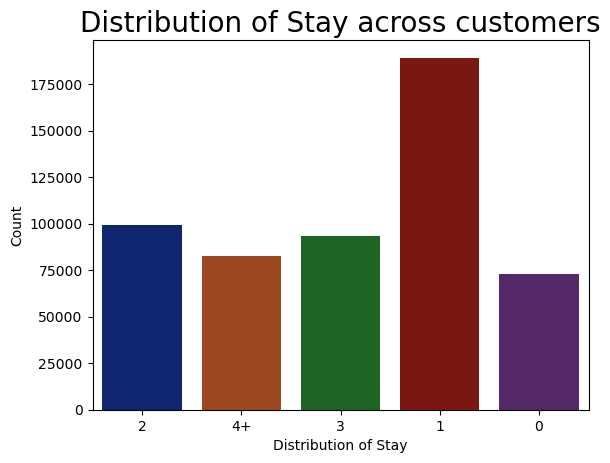

In [21]:
sns.countplot(x=data['Stay_In_Current_City_Years'], palette = 'dark')
plt.title('Distribution of Stay across customers', fontsize = 20)
plt.xlabel('Distribution of Stay')
plt.ylabel('Count')
plt.show()

In [22]:
# visualizing the Marital Status

data['Marital_Status'].value_counts()

Marital_Status
0    317817
1    219760
Name: count, dtype: int64

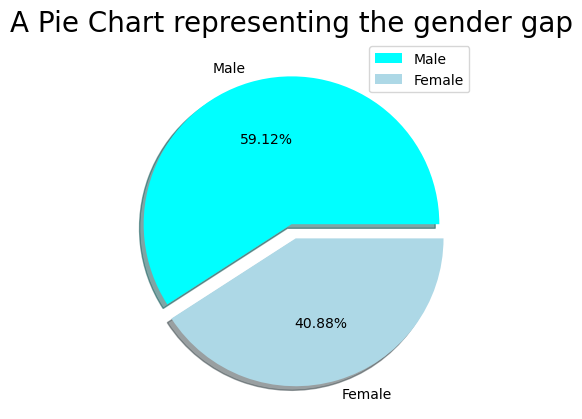

In [23]:
# pie chart 

size = [317817, 219760]
labels = ['Male', 'Female']
colors = ['cyan', 'lightblue']
explode = [0, 0.1]

plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.legend()
plt.show()

In [24]:
# checking the dependency of marital status on purchasing power

data[['Marital_Status','Purchase']].groupby('Marital_Status').mean()

,Purchase
Marital_Status,
0,9333.325467
1,9334.632681


Text(0, 0.5, 'Count')

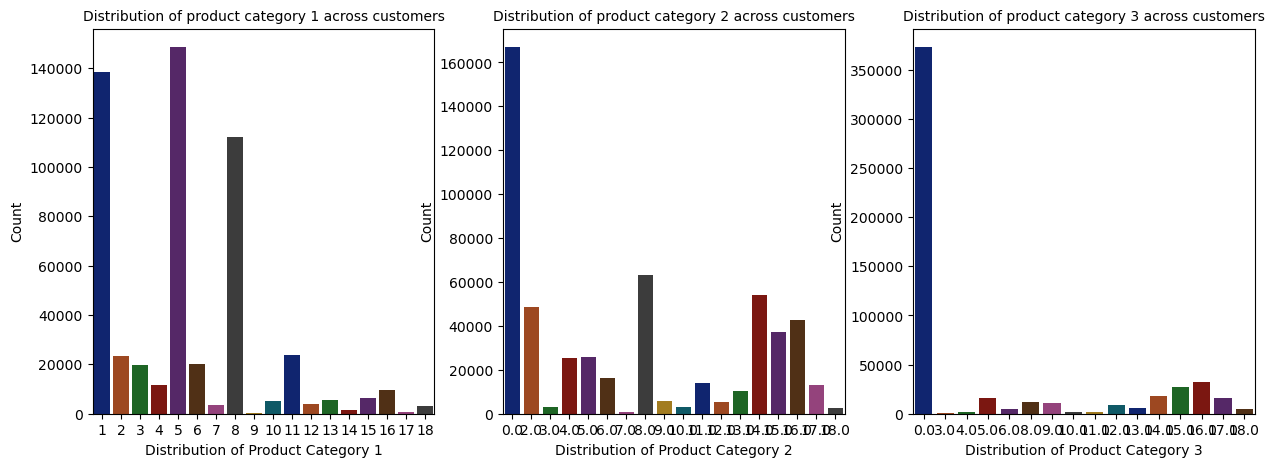

In [25]:
# visualizing the product category 

plt.rcParams['figure.figsize'] = (15, 5)

plt.subplot(131)
sns.countplot(x=data['Product_Category_1'], palette = 'dark')
plt.title('Distribution of product category 1 across customers', fontsize = 10)
plt.xlabel('Distribution of Product Category 1')
plt.ylabel('Count')

plt.subplot(132)
sns.countplot(x=data['Product_Category_2'], palette = 'dark')
plt.title('Distribution of product category 2 across customers', fontsize = 10)
plt.xlabel('Distribution of Product Category 2')
plt.ylabel('Count')

plt.subplot(133)
sns.countplot(x=data['Product_Category_3'], palette = 'dark')
plt.title('Distribution of product category 3 across customers', fontsize = 10)
plt.xlabel('Distribution of Product Category 3')
plt.ylabel('Count')

In [26]:
# checking the dependency of product 1 on purchasing power

data[['Product_Category_1', 'Purchase']].groupby('Product_Category_1').mean()

,Purchase
Product_Category_1,
1,13607.701495
2,11255.680752
3,10096.841705
4,2328.862886
5,6238.004045
6,15837.893573
7,16373.830153
8,7497.354850
9,15538.297030


In [44]:
data = pd.get_dummies(data)

# checking the shape of new dataset
data.shape

(537577, 21)

In [45]:
# splitting the data into dependent and independents sets

y = data['Purchase']

# now removing the purchase column from the dataset
X = data.drop(['Purchase'], axis = 1)



In [46]:
X.shape

(537577, 20)

In [47]:
y.shape

(537577,)

In [48]:
# splitting into training and testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

In [49]:
x_train.shape

(376303, 20)

In [51]:
data.sample(2)

,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,...,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
364170,4,2,1,5,14.0,0.0,5232,False,True,False,...,True,False,False,False,False,False,False,False,True,False
378825,16,1,0,7,0.0,0.0,20638,False,True,False,...,False,True,False,False,False,True,False,False,False,False


In [55]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [56]:
#### Modelling

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = Ridge()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [57]:
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 4627.798259989724
R2 Score: 0.13729902995096854


In [58]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 2, learning_rate = 0.1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 2939.0956510933747
R2 Score: 0.6520323342831617
